# Testing Zero-Inflated Count Matrix Factorization in Usoskin data 

In [1]:
from pCMF.misc import utils, plot_utils, print_utils
from pCMF.misc.model_wrapper import ModelWrapper
from pCMF.models.pcmf import pcmf

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

import pandas as pd
from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
expression_path = '../data/Usoskin/expression.csv'
labels_path = '../data/Usoskin/labels.csv'

In [3]:
X_log, y = pd.read_csv(expression_path), pd.read_csv(labels_path)

In [4]:
X_log.shape

(17772, 623)

In [5]:
X_log.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V613,V614,V615,V616,V617,V618,V619,V620,V621,V622
0,V1,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000
1,V2,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000
2,V3,0.0,0.0,0.0,0.0000,0.0,3.6583,0.0000,5.1206,6.0105,...,0.0000,5.1113,0.0000,1.0775,1.4048,6.2955,5.4359,4.7136,0.00000,4.4926
3,V4,0.0,0.0,0.0,0.0000,0.0,3.6583,0.0000,0.0000,0.0000,...,5.3555,0.0000,4.3539,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000
4,V5,0.0,0.0,0.0,3.2841,0.0,4.3385,4.4243,0.0000,6.0105,...,0.0000,5.1978,3.7885,0.0000,0.0000,5.2212,3.6574,4.9990,0.36434,0.0000


In [6]:
X_log = X_log.drop(X_log.columns[0], axis=1)

In [7]:
X_log.shape

(17772, 622)

In [8]:
X_log = np.array(X_log.T)

In [9]:
y = y.drop(y.columns[0], axis=1)

In [10]:
y = np.array(y).ravel()

## Look at the normalized log-counts distribution

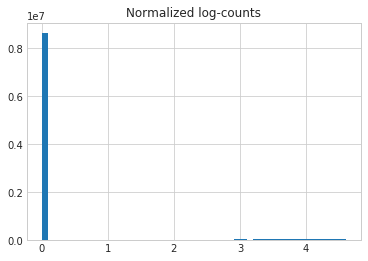

In [11]:
sortedex = np.sort(X_log.flatten())[:int(0.9*X_log.size)]

bins = np.linspace(0, sortedex.max(), num=50)

plt.hist(sortedex, bins)
plt.title('Normalized log-counts')
plt.show()

In [12]:
X = np.exp(X_log) - 1

In [13]:
X = np.round(X)

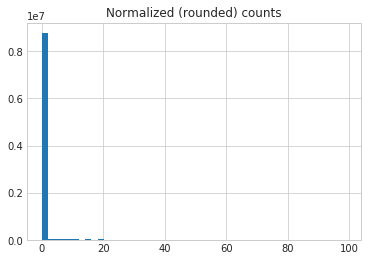

In [14]:
sortedex = np.sort(X.flatten())[:int(0.9*X.size)]

bins = np.linspace(0, sortedex.max(), num=50)

plt.hist(sortedex, bins)
plt.title('Normalized (rounded) counts')
plt.show()

In [15]:
# Run PCA
print('Running PCA...')
obj = PCA(n_components=10)
pca = ModelWrapper(X_log, y, name='PCA')
pca.run(obj.fit_transform)
print('Done.\n')

Running PCA...
Done.



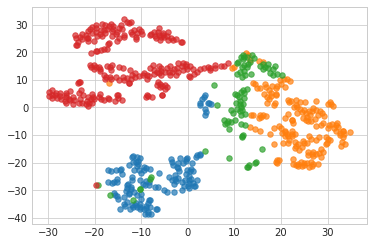

In [16]:
plot_utils.plot_tsne(pca.proj_2d, pca.c_train)

In [18]:
T = 60 * 20
S = 1
max_iter = 1000

In [19]:
print('Running PCMF...')
cavi = pcmf.PCMF(X, y)
cavi.run(max_iter=max_iter, max_time=T, sampling_rate=S, do_imp=False, do_holl=False, do_dll=False, verbose=True)
print('Done.\n')

Running PCMF...
CAVI-EB:
Considering zero-inflated counts.
Considering loading sparsity.
Running CAVI-EB...


KeyboardInterrupt: 

In [ ]:
plot_utils.plot_model_convergence([cavi], 'll_it')

In [ ]:
print_utils.print_model_silhouettes([cavi, pca])

In [ ]:
fig = plt.figure(figsize=(14, 4))
ax = plt.axes()
plot_utils.plot_sorted_tsnes([pca, cavi], y, ax=ax)
plt.show()